# FIFA World Cup



The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football.
The World Cups dataset show all information about all the World Cups in the history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups.

<img src="R.png" alt="Image Title" width="1000">

# Data Preparation and Cleaning


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
world_cups = pd.read_csv('WorldCups.csv')
world_cup_player = pd.read_csv('WorldCupPlayers.csv')
world_cups_matches = pd.read_csv('WorldCupMatches.csv')

In [4]:
print(f"The shape of the above csv files are {world_cups.shape},{world_cup_player.shape},{world_cups_matches.shape}")

The shape of the above csv files are (20, 10),(37784, 9),(852, 20)


In [5]:
#Dropping NA value from data sets
world_cup_player = world_cup_player.dropna()
world_cups = world_cups.dropna()
world_cups_matches = world_cups_matches.dropna()

In [6]:
world_cups['Attendance'] = world_cups['Attendance'].astype(str).apply(lambda x: x.split('.')[0]).astype('int64')


In [7]:
#Sample views on Datasets
world_cups.head(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768


In [8]:
world_cup_player.sample(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
13440,293,833,CMR,VINCENT Jean (FRA),S,1,Thomas NKONO,GKC,Y80'
18415,322,30,ARG,BILARDO Carlos (ARG),S,10,Diego MARADONA,C,Y70'
26352,43950100,43950024,RSA,SONO Jomo (RSA),S,19,RADEBE,C,Y12'
37147,255951,300186508,MEX,HERRERA Miguel (MEX),S,4,R. MARQUEZ,C,Y90'
15338,294,788,BRA,SANTANA Tele (BRA),S,8,SOCRATES,C,G12'


In [9]:
world_cups_matches.sample(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
437,1990,18 Jun 1990 - 21:00,Group B,Stadio San Nicola,Bari,Cameroon,0,4,Soviet Union,,37307.0,0,2,RAMIZ WRIGHT Jose (BRA),D ELIA Pietro (ITA),ROETHLISBERGER Kurt (SUI),322,111,CMR,URS
671,2006,18 Jun 2006 - 18:00,Group F,"FIFA World Cup Stadium, Munich",Munich,Brazil,2,0,Australia,,66000.0,0,0,MERK Markus (GER),SCHRAER Christian (GER),SALVER Jan-Hendrik (GER),97410100,97410027,BRA,AUS
251,1974,22 June 1974 - 19:30,Group 1,Volksparkstadion,Hamburg,German DR,1,0,Germany FR,,60200.0,0,0,BARRETO RUIZ Ramon (URU),MARQUES Armando (BRA),PESTARINO Luis (ARG),262,2062,GDR,FRG
817,2014,26 Jun 2014 - 13:00,Group G,Estadio Nacional,Brasilia,Portugal,2,1,Ghana,,67540.0,1,0,SHUKRALLA Nawaf (BHR),TULEFAT Yaser (BHR),SALEH Ebrahim (BHR),255931,300186476,POR,GHA
771,2010,11 Jul 2010 - 20:30,Final,Soccer City Stadium,Johannesburg,Netherlands,0,1,Spain,Spain win after extra time,84490.0,0,0,WEBB Howard (ENG),Darren CANN (ENG),MULLARKEY Michael (ENG),249721,300061509,NED,ESP


In [10]:
world_cups.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


# Exploratory Analysis and Visualization

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Countries that have won the World cup atleast once:

In [12]:
unique=world_cups.Winner.unique()
print(unique)

['Uruguay' 'Italy' 'Germany FR' 'Brazil' 'England' 'Argentina' 'France'
 'Spain' 'Germany']


#### Number of Players that have used the mentioned Shirt Numbers in the Dataset:

In [13]:
count=world_cup_player[['Shirt Number','Player Name']].groupby('Shirt Number').count()
count = count.rename(columns={'Player Name': 'Number of Players'})
count.sample(8)

,Number of Players
Shirt Number,
7,34
10,92
13,10
14,12
8,30
18,7
19,11
6,24


#### Total Matches Played in the World cup:

Total Football matches played in FIFA World Cup: 836


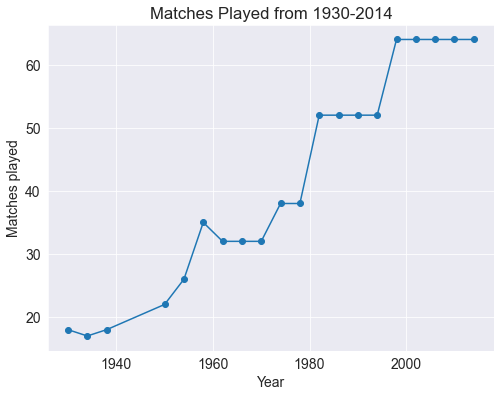

In [14]:
print("Total Football matches played in FIFA World Cup:",world_cups.MatchesPlayed.sum())
plt.title('Matches Played from 1930-2014')
plt.xlabel('Year')
plt.ylabel('Matches played')
plt.plot(world_cups.Year,world_cups.MatchesPlayed,marker='o');


#### Number of times the stadiums have been used in the football matches throughout the years:

In [15]:
stadiums=world_cups_matches['Stadium'].value_counts()
print(stadiums)

Estadio Azteca             19
Olympiastadion             14
Jalisco                    14
Nou Camp - Estadio Le�n    11
Estadio Centenario         10
                           ..
Comunale di Cornaredo       1
Rimnersvallen               1
Tunavallen                  1
White City                  1
Eyravallen                  1
Name: Stadium, Length: 181, dtype: int64


#### Top 10 Stadiums with Maximum Usage:

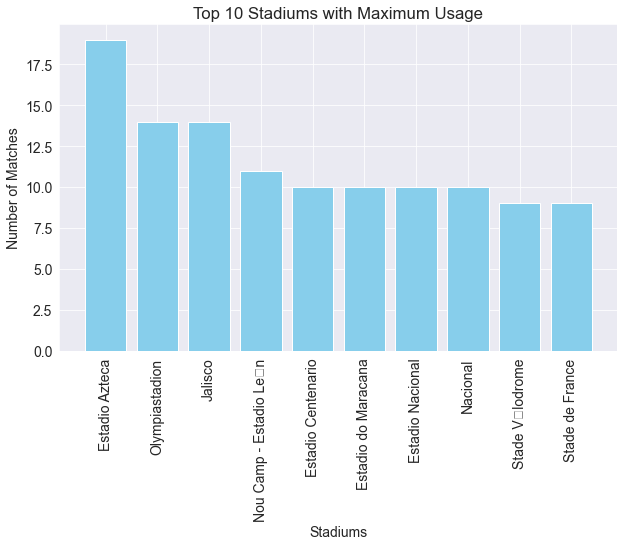

In [16]:
import matplotlib.pyplot as plt

stadium_counts = world_cups_matches['Stadium'].value_counts()

top_10_stadiums = stadium_counts.nlargest(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_stadiums.index, top_10_stadiums.values, color='skyblue')
plt.xlabel('Stadiums')
plt.ylabel('Number of Matches')
plt.title('Top 10 Stadiums with Maximum Usage')

plt.xticks(rotation=90)

plt.show()


# Sample Question and Answers

#### Q1:What is the Number of Podiums secured by each Country?

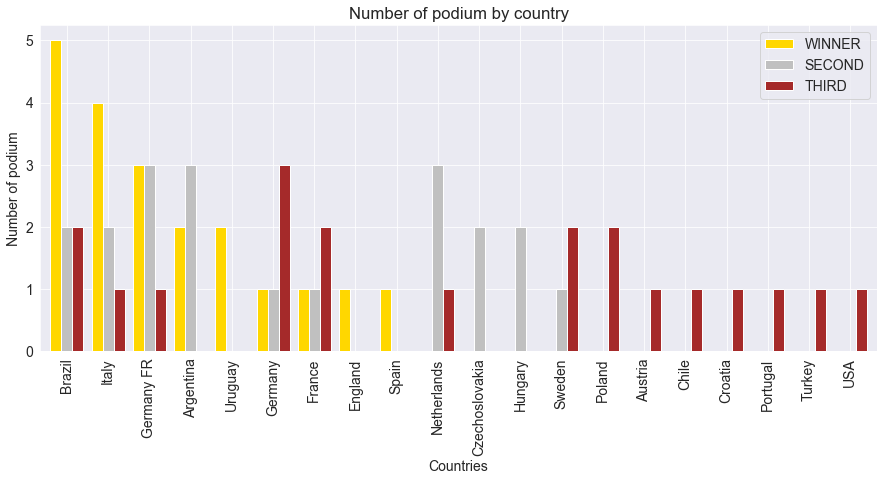

In [17]:
gold = world_cups["Winner"]
silver = world_cups["Runners-Up"]
bronze = world_cups["Third"]

gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')
podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center');
plt.xlabel('Countries');
plt.ylabel('Number of podium');
plt.title('Number of podium by country');

#### Q2: What is the Number of Goals secured by each country?

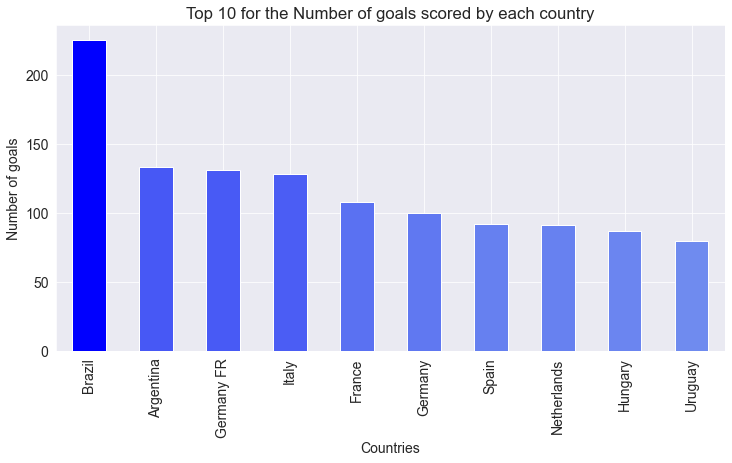

In [18]:
import matplotlib.colors as mcolors

home = world_cups_matches[['Home Team Name', 'Home Team Goals']].dropna()
away = world_cups_matches[['Away Team Name', 'Away Team Goals']].dropna()

goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)


num_colors = 10
cmap = mcolors.LinearSegmentedColormap.from_list('color_map', [ 'lightblue','blue'])


norm = mcolors.Normalize(vmin=goal_per_country.values.min(), vmax=goal_per_country.values.max())


colors = [cmap(norm(value)) for value in goal_per_country.values]


goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", color=colors, figsize=(12, 6), fontsize=14)

plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 for the Number of goals scored by each country')

plt.show()

#### Q3: What is the Number of times each country has won the world cup?

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64


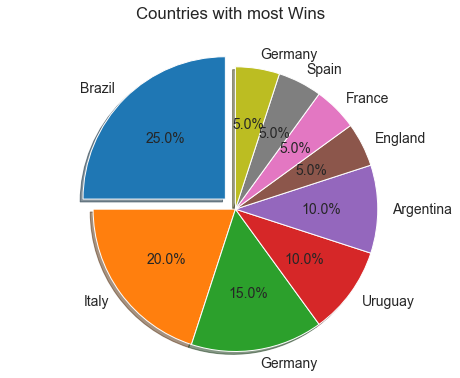

In [19]:
# Pie chart
labels = ['Brazil','Italy','Germany','Uruguay','Argentina','England','France' ,'Spain','Germany']
counts = world_cups['Winner'].value_counts()
print(counts)
sizes = list(counts)
explode = (0.1, 0,0, 0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Countries with most Wins\n')
plt.show();

#### Q4 What is the Attendance, number of teams, goals and matches played in each world cup:

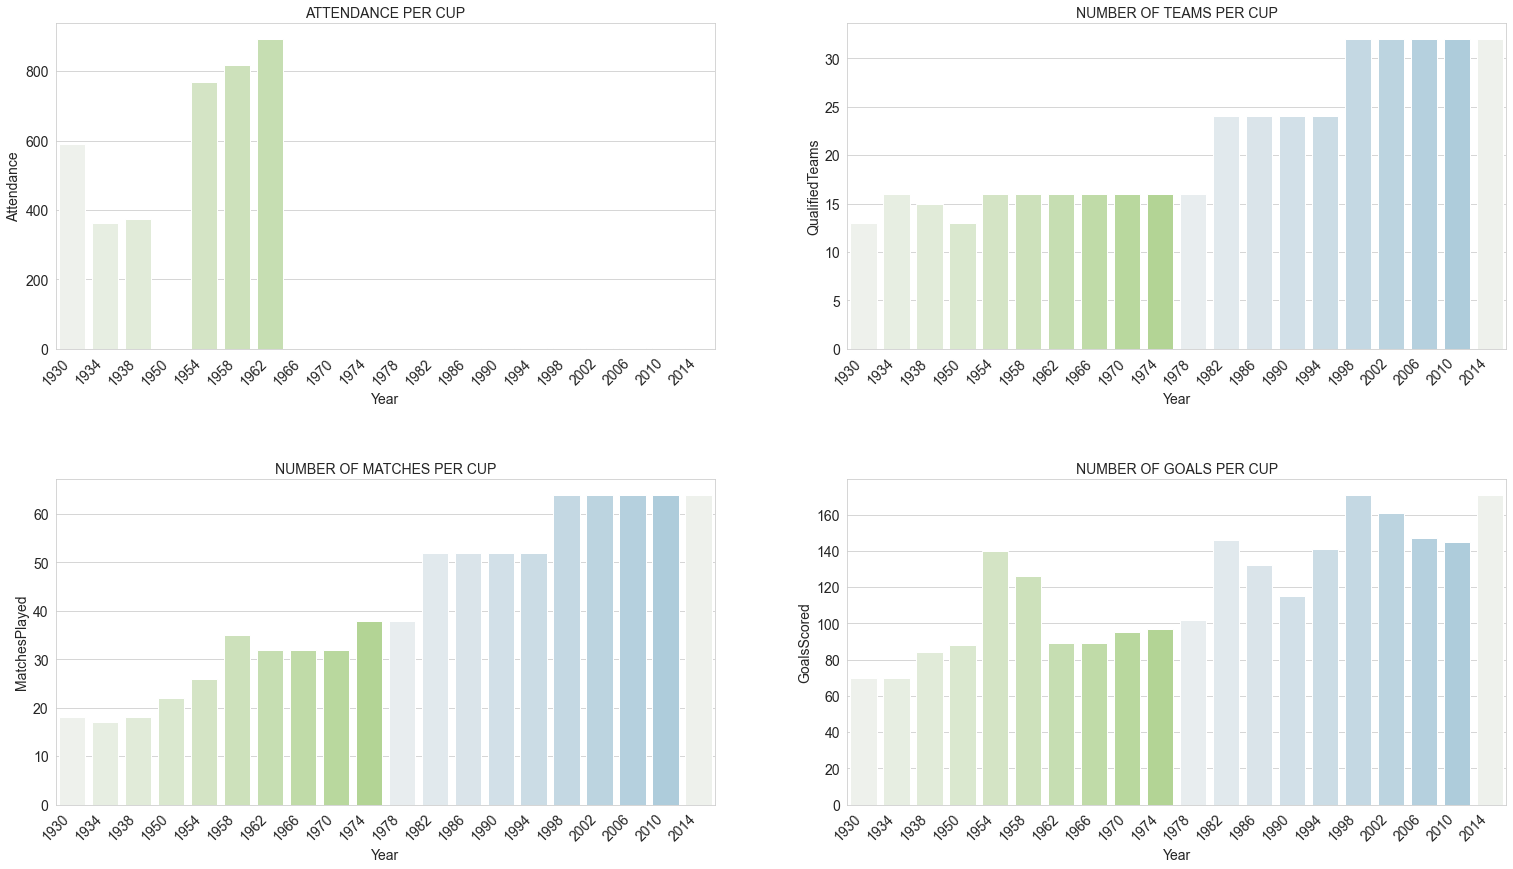

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

start_color = '#B2DF8A'  
end_color = '#A6CEE3'   

palette1 = sns.light_palette(start_color, n_colors=10)
palette2 = sns.light_palette(end_color, n_colors=10)

palette = palette1 + palette2[1:]  
plt.figure(figsize=(26, 14))
sns.set_style("whitegrid")

plt.subplot(221)
g1 = sns.barplot(x="Year", y="Attendance", data=world_cups, palette=palette)
g1.set_title("ATTENDANCE PER CUP", fontsize=14)
g1.set_xticklabels(g1.get_xticklabels(), rotation=45, ha='right')

plt.subplot(222)
g2 = sns.barplot(x="Year", y="QualifiedTeams", data=world_cups, palette=palette)
g2.set_title("NUMBER OF TEAMS PER CUP", fontsize=14)
g2.set_xticklabels(g2.get_xticklabels(), rotation=45, ha='right')

plt.subplot(223)
g3 = sns.barplot(x="Year", y="MatchesPlayed", data=world_cups, palette=palette)
g3.set_title("NUMBER OF MATCHES PER CUP", fontsize=14)
g3.set_xticklabels(g3.get_xticklabels(), rotation=45, ha='right')

plt.subplot(224)
g4 = sns.barplot(x="Year", y="GoalsScored", data=world_cups, palette=palette)
g4.set_title("NUMBER OF GOALS PER CUP", fontsize=14)
g4.set_xticklabels(g4.get_xticklabels(), rotation=45, ha='right')

plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9)

plt.show()

#### Q5: What is the range of audience present for the matches in all these years?

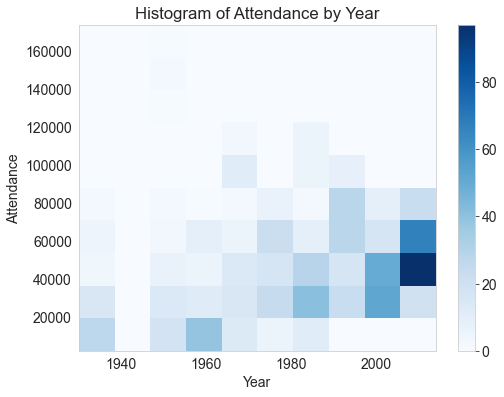

In [21]:
attendance = world_cups_matches['Attendance']
year = world_cups_matches['Year']


plt.hist2d(year, attendance, bins=10, cmap='Blues')

plt.xlabel('Year')
plt.ylabel('Attendance')
plt.title('Histogram of Attendance by Year')

plt.colorbar()
plt.show()


# Inferences and Conclusion

The overall analysis done on the World cup data set showed that the number of countries and the number of matches played have increased throughout these years with a constant rate.

From the data, Brazil has won five FIFA World Cup, more than any other nation.
They won their most recent World Cup title in 2002.

In conclusion, the data sets provided great insights on the FIFA world cup tournament and about all the players and countries that have participated in the greatest sport of all time.

# References and Future Work

The future enhancements for this Data Analysis on International Football involves covering women football,Futsal,Beach soccer and many other forms of football.
The next update on this analysis would include various domestics leagues and few recognized club leagues all over the world.

References:

Kaggle Datasets: https://www.kaggle.com/datasets?fileType=csv  

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html